In [1]:
!pip install numpy
!pip install pandas
!pip install datetime
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import datetime as datetime
from operator import eq
split_date = datetime.date(2021,12,31)

In [3]:
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv("login_logs.csv")

In [5]:
df1['Dates'] = pd.to_datetime(df1['login_time']).dt.date
df1['Time'] = pd.to_datetime(df1['login_time']).dt.time
del df1['login_time']
df1['converted_date'] = df1['Dates'].astype(str) + "-" + df1['user_id'].astype(str)

In [6]:
login_logs_21 = df1.loc[df1['Dates'] <= split_date]
login_logs_22 = df1.loc[df1['Dates'] > split_date]

In [7]:
f_use_21 = login_logs_21.groupby('user_id')['login_log_id'].nunique()
f_use_22 = login_logs_22.groupby('user_id')['login_log_id'].nunique()
print ("Median frequency of sessions per user in July 2021 are",f_use_21.median())
print ("Median frequency of sessions per user in July 2022 are",f_use_22.median())


DAU_21 = login_logs_21.groupby('Dates')['user_id'].nunique()
DAU_22 = login_logs_22.groupby('Dates')['user_id'].nunique()
print ("Average Daily Active users in July 2021 are",DAU_21.mean())
print ("Average Daily Active users in July 2022 are",DAU_22.mean())

print("Number of Unique users in July 2021",login_logs_21['user_id'].nunique())
print("Number of Unique users in July 2022",login_logs_22['user_id'].nunique())

Median frequency of sessions per user in July 2021 are 7.0
Median frequency of sessions per user in July 2022 are 10.0
Average Daily Active users in July 2021 are 1515.4
Average Daily Active users in July 2022 are 2234.4333333333334
Number of Unique users in July 2021 10867
Number of Unique users in July 2022 13022


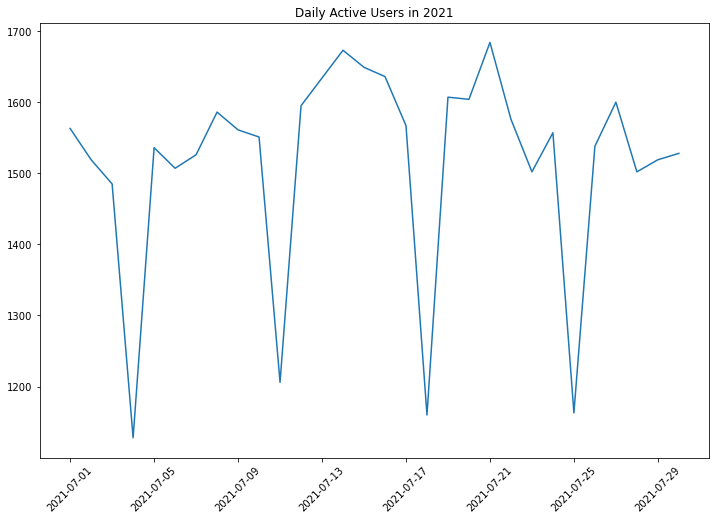

In [8]:
plt.figure(figsize = (12,8))
plt.title("Daily Active Users in 2021")
plt.xticks(rotation=45)
plt.plot(DAU_21.index,DAU_21.values)
  
# To load the display window
plt.show()

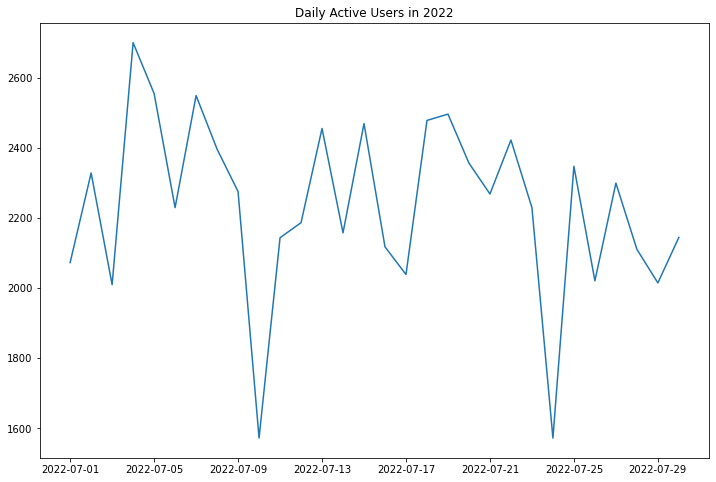

In [9]:
plt.figure(figsize = (12,8))
plt.title("Daily Active Users in 2022")
plt.plot(DAU_22.index,DAU_22.values)
  
# To load the display window
plt.show()

In [10]:
unique_users_21 = sorted(list(login_logs_21.drop_duplicates(subset='login_log_id')['login_log_id']))
unique_users_22 = sorted(list(login_logs_22.drop_duplicates(subset='login_log_id')['login_log_id']))

In [11]:
common_unique_users = list(set(unique_users_21) & set(unique_users_22))
print(f"No. of common unique users in Jul 21 and Jul 22: {len(common_unique_users)}")

No. of common unique users in Jul 21 and Jul 22: 0


In [12]:
print(unique_users_21[:10])
print(unique_users_22[:10])

print(unique_users_21[-10:])
print(unique_users_22[-10:])

[1385328, 1385329, 1385330, 1385331, 1385332, 1385333, 1385334, 1385335, 1385336, 1385337]
[4275397, 4275398, 4275399, 4275400, 4275401, 4275402, 4275403, 4275404, 4275405, 4275406]
[1656558, 1656559, 1656560, 1656561, 1656562, 1656563, 1656564, 1656565, 1656566, 1656567]
[4670504, 4670505, 4670506, 4670507, 4670508, 4670509, 4670510, 4670511, 4670512, 4670513]


In [13]:
sales_df = pd.read_csv("sales_orders.csv")
sales_orders_df = pd.read_csv("sales_orders_items.csv")

In [14]:
sales_df['date'] = pd.to_datetime(sales_df['creation_time']).dt.date
sales_df['time'] = pd.to_datetime(sales_df['creation_time']).dt.time
sales_orders_df["revenue"]= sales_orders_df["order_quantity_accepted"]*sales_orders_df["rate"]
del sales_df['creation_time']

In [15]:
sales_orders_df.rename(columns = {'fk_order_id':'order_id', 'fk_product_id':'product_id'}, inplace = True)
sales_orders_df.head()

,order_item_id,product_id,order_id,ordered_quantity,order_quantity_accepted,rate,revenue
0,62609,7818,119874,1,0,4993.00,0.00
1,62610,7607,119877,1,0,6203.40,0.00
2,62611,9916,119880,2,2,2904.41,5808.82
3,62612,11118,119880,2,2,2205.00,4410.00
4,62613,12702,119880,2,2,2200.85,4401.70


In [16]:
sales_df.rename(columns = {'date':'Dates'}, inplace = True)

In [17]:
mega = pd.merge(sales_orders_df, sales_df, how="outer", on="order_id")
mega.head(100)

,order_item_id,product_id,order_id,ordered_quantity,order_quantity_accepted,rate,revenue,fk_buyer_id,fk_depot_id,sales_order_status,Dates,time
0,62609,7818,119874,1,0,4993.00,0.00,82228,5,Rejected,2021-07-01,00:35:28
1,62610,7607,119877,1,0,6203.40,0.00,40476,1,Rejected,2021-07-01,02:02:43
2,62611,9916,119880,2,2,2904.41,5808.82,41728,8,Shipped,2021-07-01,02:42:12
3,62612,11118,119880,2,2,2205.00,4410.00,41728,8,Shipped,2021-07-01,02:42:12
4,62613,12702,119880,2,2,2200.85,4401.70,41728,8,Shipped,2021-07-01,02:42:12
...,...,...,...,...,...,...,...,...,...,...,...,...
95,62704,11147,120054,1,0,1365.00,0.00,75252,2,Rejected,2021-07-01,08:25:34
96,62705,1039,120057,5,0,2236.00,0.00,84652,2,Rejected,2021-07-01,08:26:20
97,62706,3610,120057,1,0,12674.00,0.00,84652,2,Rejected,2021-07-01,08:26:20
98,62707,3603,120057,5,0,5629.00,0.00,84652,2,Rejected,2021-07-01,08:26:20


In [18]:
sales_df_21 = mega.loc[mega['Dates'] <= split_date]
sales_df_22 = mega.loc[mega['Dates'] > split_date]
print("Number of orders made in July 2021", sales_df_21['order_id'].nunique())
print("Number of orders made in July 2022", sales_df_22['order_id'].nunique())

Number of orders made in July 2021 6216
Number of orders made in July 2022 7414


In [19]:
rev_21 = sales_df_21['revenue'].sum()
print("Revenue generated by company in July 2021", rev_21)
rev_22 = sales_df_22['revenue'].sum()
print("Revenue generated by company in July 2022", rev_22)


Revenue generated by company in July 2021 60315970.969000004
Revenue generated by company in July 2022 116858178.44


In [20]:
sales_df_21.groupby('product_id')['revenue'].sum().sort_values(ascending=False)

product_id
8219     11337874.30
8210      5328288.50
7640      2696077.60
1548      2563695.52
10975     2353035.30
            ...     
8765            0.00
8763            0.00
360             0.00
8712            0.00
12930           0.00
Name: revenue, Length: 554, dtype: float64

In [21]:
sales_df_22.groupby('product_id')['revenue'].sum().sort_values(ascending=False)

product_id
12547    9716031.0
3610     9520258.0
8219     9163587.0
8444     6982455.0
7640     6508070.0
           ...    
7649           0.0
7643           0.0
7638           0.0
7626           0.0
337            0.0
Name: revenue, Length: 483, dtype: float64

In [22]:
mega_users_21 = pd.merge(login_logs_21, sales_df, how="left", on="Dates")
mega_users_21

,login_log_id,user_id,Dates,Time,converted_date,order_id,fk_buyer_id,fk_depot_id,sales_order_status,time
0,1385328,99160,2021-07-01,00:00:33,2021-07-01-99160,119874,82228,5,Rejected,00:35:28
1,1385328,99160,2021-07-01,00:00:33,2021-07-01-99160,119877,40476,1,Rejected,02:02:43
2,1385328,99160,2021-07-01,00:00:33,2021-07-01-99160,119880,41728,8,Shipped,02:42:12
3,1385328,99160,2021-07-01,00:00:33,2021-07-01-99160,119883,97616,4,Rejected,02:56:00
4,1385328,99160,2021-07-01,00:00:33,2021-07-01-99160,119886,12440,1,Rejected,03:11:31
...,...,...,...,...,...,...,...,...,...,...
59499102,1656567,85780,2021-07-30,23:55:19,2021-07-30-85780,138507,76516,8,Rejected,17:45:38
59499103,1656567,85780,2021-07-30,23:55:19,2021-07-30-85780,138510,58192,1,Rejected,18:35:37
59499104,1656567,85780,2021-07-30,23:55:19,2021-07-30-85780,138513,45296,1,Rejected,23:08:06
59499105,1656567,85780,2021-07-30,23:55:19,2021-07-30-85780,138516,45296,1,Rejected,23:12:30


In [23]:
mega_users_21_final = mega_users_21[['Dates', 'login_log_id', 'order_id']]

In [24]:
mega_users_22 = pd.merge(login_logs_22, sales_df, how="left", on="Dates")

In [25]:
mega_users_22_final = mega_users_22[['Dates', 'login_log_id', 'order_id']]

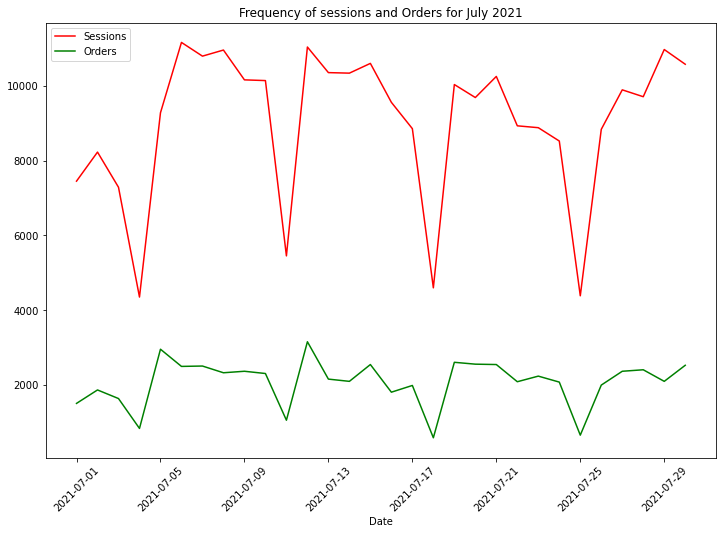

In [26]:
# Assign variables to the y axis part of the curve

y = mega_users_21_final.groupby('Dates')['login_log_id'].nunique()
z = 10*mega_users_21_final.groupby('Dates')['order_id'].nunique()

X = y.index
plt.figure(figsize = (12,8))

# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='Sessions')
plt.plot(X, z, color='g', label='Orders')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.title("Frequency of sessions and Orders for July 2021")

  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [27]:


y = mega_users_22_final.groupby('Dates')['login_log_id'].nunique()
z = 10*mega_users_22_final.groupby('Dates')['order_id'].nunique()

X = y.index
plt.figure(figsize = (12,8))

# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='Sessions')
plt.plot(X, z, color='g', label='Orders')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.title("Frequency of sessions and Orders for July 2022")

  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()